![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

Submission instructions:

The p-value and the result of the test must be stored in a dictionary called result_dict in the form:

result_dict = {"p_val": p_val, "result": result}

where p_val is the p-value and result is either the string "fail to reject" or "reject", depending on the result of the test.

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin

#women
df_w = pd.read_csv('women_results.csv')
df_w['date'] = pd.to_datetime(df_w['date'])
#filtering for women
fifa_wc_games = df_w['tournament'] == 'FIFA World Cup'
df_w = df_w[fifa_wc_games]
df_w = df_w[df_w['date'] >= '2002-01-01']

#men
df_m = pd.read_csv('men_results.csv')
df_m['date'] = pd.to_datetime(df_m['date'])
#filtering for men
fifa_wc_games = df_m['tournament'] == 'FIFA World Cup'
df_m = df_m[fifa_wc_games]
df_m = df_m[df_m['date'] >= '2002-01-01']

df_w.info()
df_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1600 to 4469
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  200 non-null    int64         
 1   date        200 non-null    datetime64[ns]
 2   home_team   200 non-null    object        
 3   away_team   200 non-null    object        
 4   home_score  200 non-null    int64         
 5   away_score  200 non-null    int64         
 6   tournament  200 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 12.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 384 entries, 25164 to 44352
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  384 non-null    int64         
 1   date        384 non-null    datetime64[ns]
 2   home_team   384 non-null    object        
 3   away_team   384 non-null    object 

<AxesSubplot: >

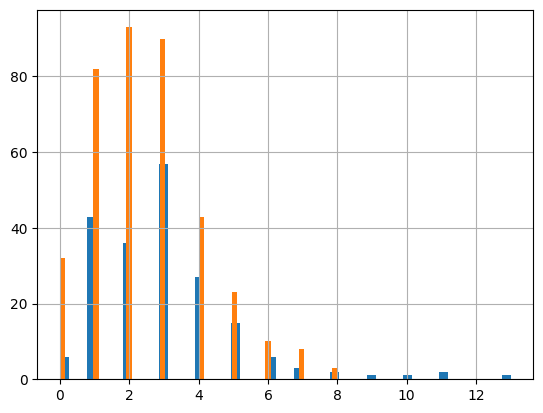

In [57]:
#adding total goals column to both tables

df_w['goals_scored'] = df_w['home_score'] + df_w['away_score']
df_m['goals_scored'] = df_m['home_score'] + df_m['away_score']
#checking the distributions
df_w['goals_scored'].hist(bins=50)
df_m['goals_scored'].hist(bins=50)

The 'goals_scored' columns don't appear to be normally distributed. Instead of t-test, we will use mwu-test.

In [58]:
#merging the tables with concat()
df_w['gender'] = 'women'
df_m['gender'] = 'men'
df_both = pd.concat([df_w, df_m], axis=0)

#pivoting the table for mwu test
women_vs_men = df_both[['gender', 'goals_scored']]
women_vs_men_wide = women_vs_men.pivot(columns='gender', values='goals_scored')

#mwu test
df_test = pingouin.mwu(x=women_vs_men_wide['women'], y=women_vs_men_wide['men'], alternative='greater')
df_test

,U-val,alternative,p-val,RBC,CLES
MWU,43273.0,greater,0.005107,-0.126901,0.563451


In [59]:
#extracting the p_value
p_val = df_test['p-val'].iloc[0]

# Determine hypothesis test result using sig. level
if p_val <= 0.01:
    result = "reject"
else:
    result = "fail to reject"

result_dict = {"p_val": p_val, "result": result}